In [1]:
# Import libraries (copy from Syllabus)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

In [2]:
# Import data types file
types = pd.read_csv('./data/dtypes_survey_music_clean.csv', 
                    index_col=0).to_dict()['0']

In [3]:
# Import dataset
survey_df = pd.read_csv('./data/survey_music_clean.csv')

for col, dtype in types.items():
    survey_df[col] = survey_df[col].astype(dtype)

In [4]:
# Validation of data types
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     724 non-null    datetime64[ns]
 1   Age                           724 non-null    float64       
 2   Primary streaming service     724 non-null    category      
 3   Hours per day                 724 non-null    float64       
 4   While working                 724 non-null    category      
 5   Instrumentalist               724 non-null    category      
 6   Composer                      724 non-null    category      
 7   Fav genre                     724 non-null    category      
 8   Exploratory                   724 non-null    category      
 9   Foreign languages             724 non-null    category      
 10  BPM                           724 non-null    float64       
 11  Frequency [Classical]         72

In [5]:
# Let's see some random records
survey_df.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
326,2022-08-29 03:13:27,20.0,apple music,3.0,yes,yes,no,metal,yes,no,...,0.0,1.0,3.0,2.0,7.0,4.0,7.0,0.0,improve,i understand.
518,2022-08-29 03:44:33,21.0,spotify,3.0,yes,no,no,hip hop,yes,yes,...,3.0,3.0,3.0,0.0,8.0,8.0,3.0,3.0,improve,i understand.
554,2022-08-28 18:33:32,32.0,spotify,3.0,yes,yes,yes,rock,yes,yes,...,3.0,1.0,3.0,1.0,6.0,6.0,7.0,5.0,improve,i understand.
33,2022-08-28 18:35:17,21.0,i do not use a streaming service.,3.0,yes,no,no,rock,no,no,...,1.0,2.0,3.0,3.0,9.0,10.0,3.0,0.0,no effect,i understand.
375,2022-09-04 15:41:59,16.0,spotify,7.0,yes,no,no,video game music,yes,no,...,0.0,3.0,1.0,2.0,4.0,8.0,8.0,4.0,no effect,i understand.


# EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a process of analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA is a critical step in the data science process as it allows one to understand the underlying patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. This approach is often open-ended, where the analyst probes the data in various ways to uncover underlying structures and insights.


## How is 'Age' and 'Hours per day' distributed?

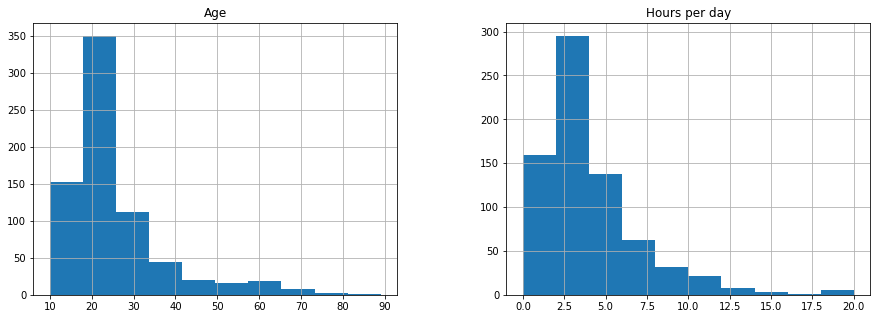

In [6]:
survey_df[['Age','Hours per day']].hist(figsize=(15,5))
plt.show()

- The majority of respondents appear to be young, although there are some older individuals in the dataset.
- The music listening habits are concentrated between 2.5 and 4 hours per day for almost everyone. While it would be intriguing if the distribution exhibited a bimodal pattern, suggesting potential segmentation based on age or daily listening hours, such a trend does not seem to be present in the data.

## Streaming Service Usage

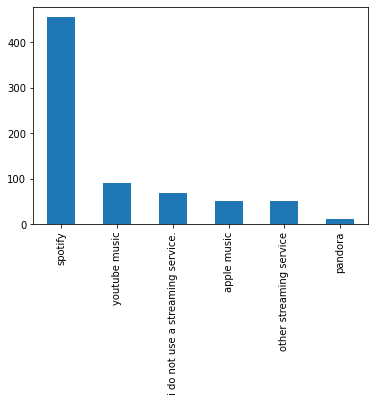

In [7]:
survey_df['Primary streaming service'].value_counts().plot(kind='bar');

Spotify has the largest amount of music. It is interesting to see that in third place we get no streaming service. From this plot we can continue and see the distribution of hours per day listened by those without a streaming service

<AxesSubplot:>

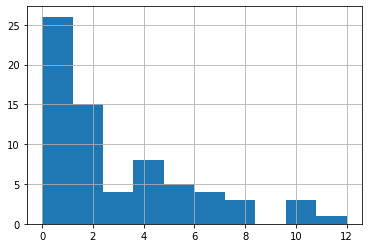

In [8]:
df_wo_stream=survey_df[survey_df["Primary streaming service"]==
                       "i do not use a streaming service."]
df_wo_stream['Hours per day'].hist()

More 0's here compared to entries with streaming services. Highlights the significance for Music Therapy—having a streaming service appears linked to increased listening time. Suggests potential adjustments if listening time needs curbing when streaming services are limited or absent.